This study aims to understand the patterns of online purchase intention and try to predict online purchases using measurable behavioural variables. Specifically: 
1. Is there any seasonal trend in online shopping purchase rates? This helps craft marketing campaigns aligning with peak shopping periods, potentially boosting sales.
2. What is the difference between the profiles of purchased and not purchased visiting? This is a starting point for further, more detailed exploration.
3. What is the difference between user groups (e.g. different visitor types, regions, os, and traffic types)? This helps target the right audience segments and optimise marketing efforts and ROI.
4. How does browsing influence purchase conversion rate? Is quick browsing more likely to lead to a higher purchase rate or is it the other way around? This inspires and helps optimise the product page design.
5. Can we build an effective purchase prediction model using these features? How effective is it? What is the most important feature? It helps identify the key drivers of purchase behaviour and is valuable for marketing strategies and product design.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. data overview

In [2]:
# read dataset

df = pd.read_csv('online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

## 1.1 dataset overviews

In [3]:
# check datatype and missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## 1.2 descriptive stats

In [4]:
# check descriptive stats for numerical variables

df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [5]:
df.describe().to_clipboard()

In [6]:
# check decsriptive stats of categorical variables

df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [7]:
# check decsriptive stats of categorical variables

df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [8]:
df['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

In [9]:
df['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

In [10]:
df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [11]:
df['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

In [12]:
df['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

In [13]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

## 1.3 check distribution

In [14]:
# sns.pairplot(df);

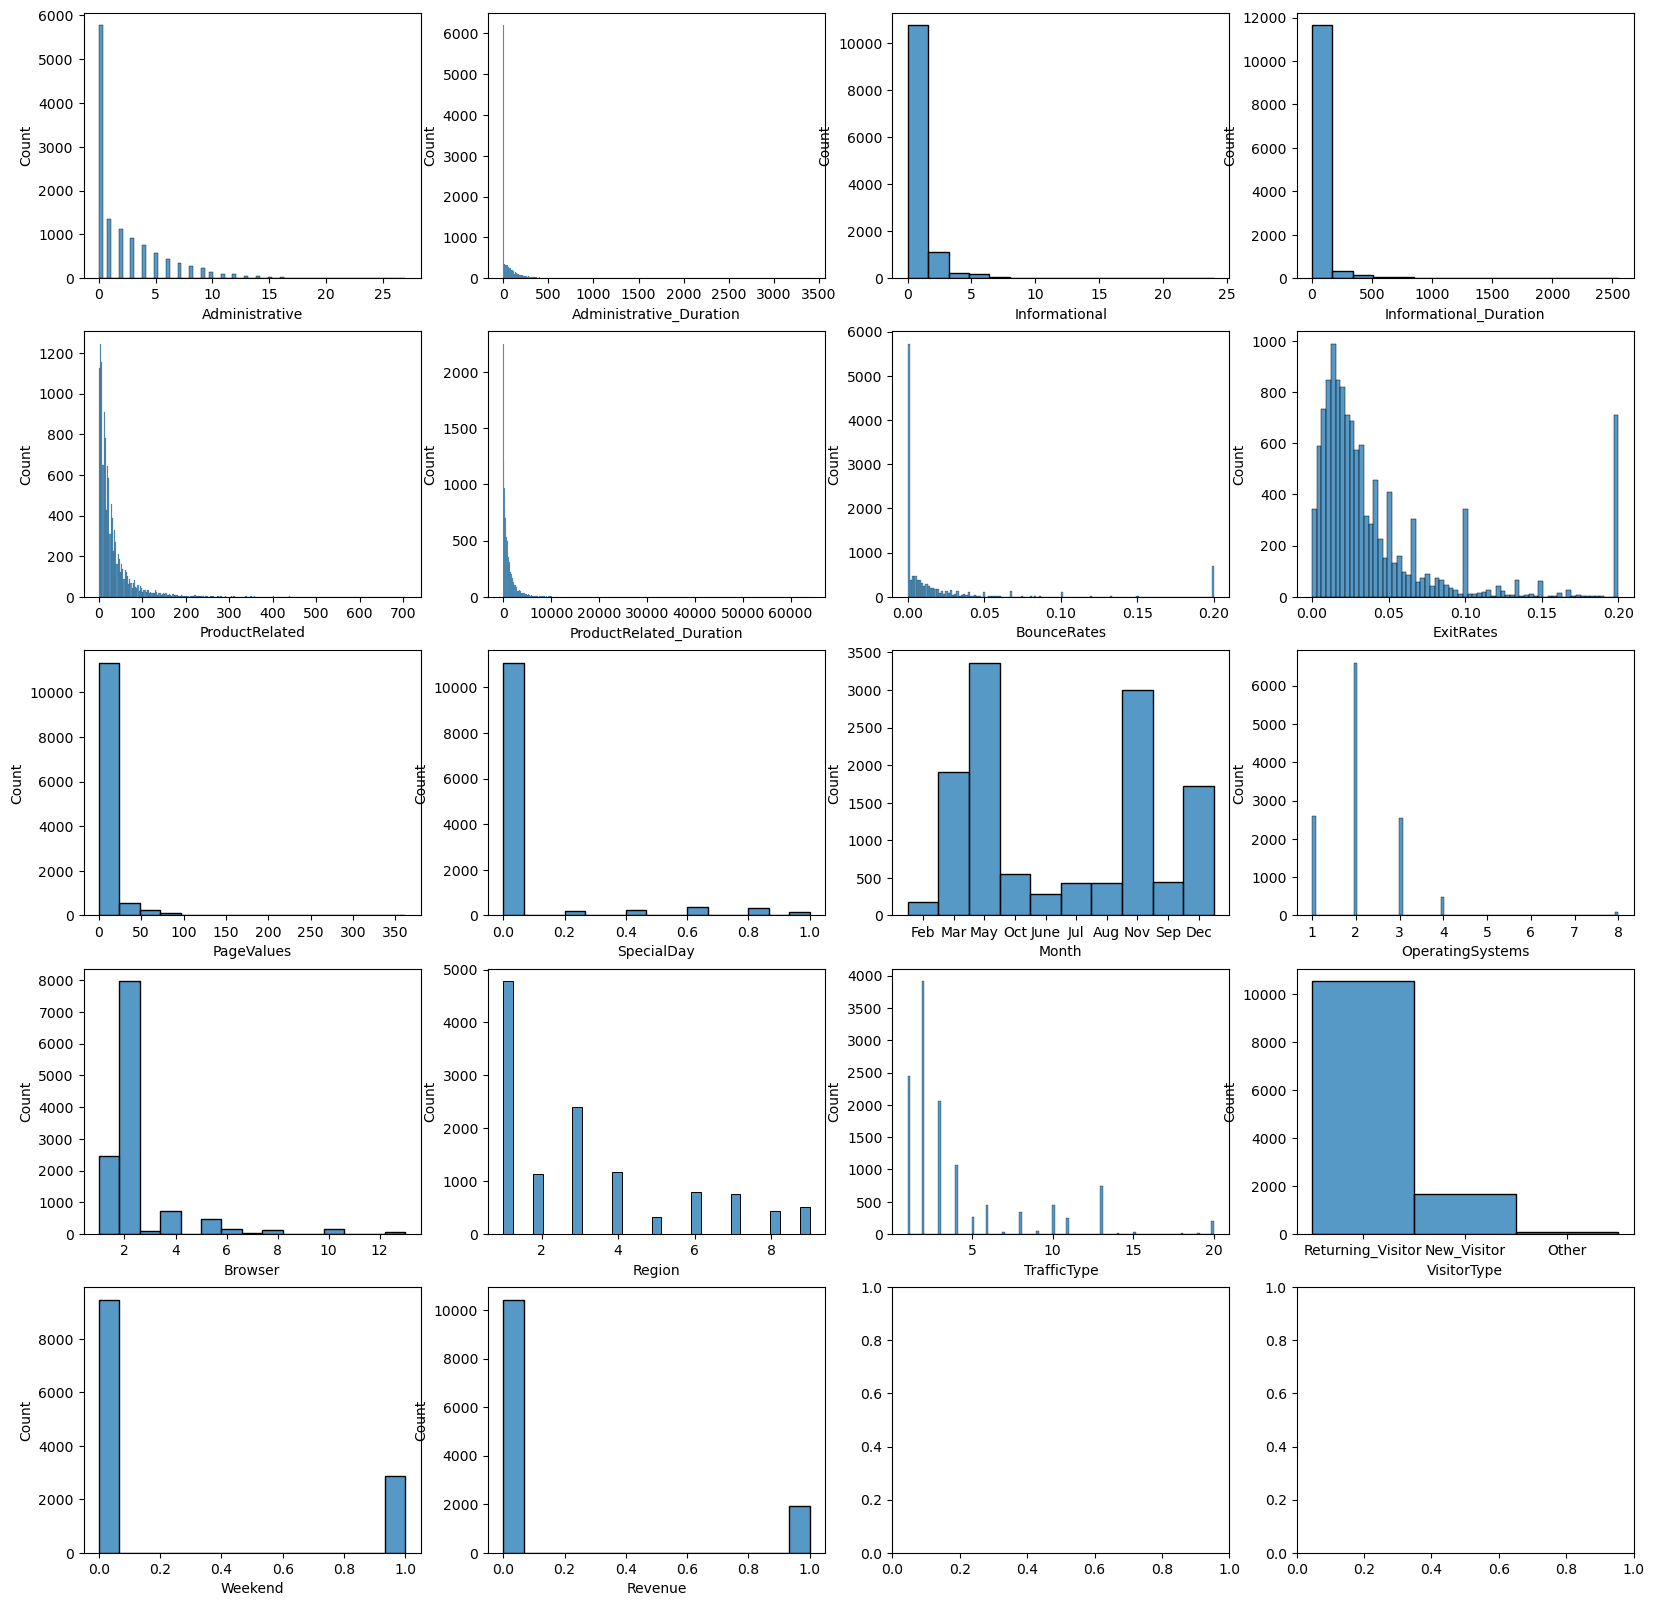

In [15]:
fig, ax = plt.subplots(5,4, figsize=(20,20))

sns.histplot(x='Administrative', data=df,ax=ax[0,0])
sns.histplot(x='Administrative_Duration', data=df,ax=ax[0,1])
sns.histplot(x='Informational', data=df,ax=ax[0,2])
sns.histplot(x='Informational_Duration', data=df,ax=ax[0,3])
sns.histplot(x='ProductRelated', data=df,ax=ax[1,0])
sns.histplot(x='ProductRelated_Duration', data=df,ax=ax[1,1])
sns.histplot(x='BounceRates', data=df,ax=ax[1,2])
sns.histplot(x='ExitRates', data=df,ax=ax[1,3])
sns.histplot(x='PageValues', data=df,ax=ax[2,0])
sns.histplot(x='SpecialDay', data=df,ax=ax[2,1])
sns.histplot(x='Month', data=df,ax=ax[2,2])
sns.histplot(x='OperatingSystems', data=df,ax=ax[2,3])
sns.histplot(x='Browser', data=df,ax=ax[3,0])
sns.histplot(x='Region', data=df,ax=ax[3,1])
sns.histplot(x='TrafficType', data=df,ax=ax[3,2])
sns.histplot(x='VisitorType', data=df,ax=ax[3,3])
sns.histplot(x='Weekend', data=df,ax=ax[4,0])
sns.histplot(x='Revenue', data=df,ax=ax[4,1])
plt.show()

## 1.4 check outliers

### check overall outliers

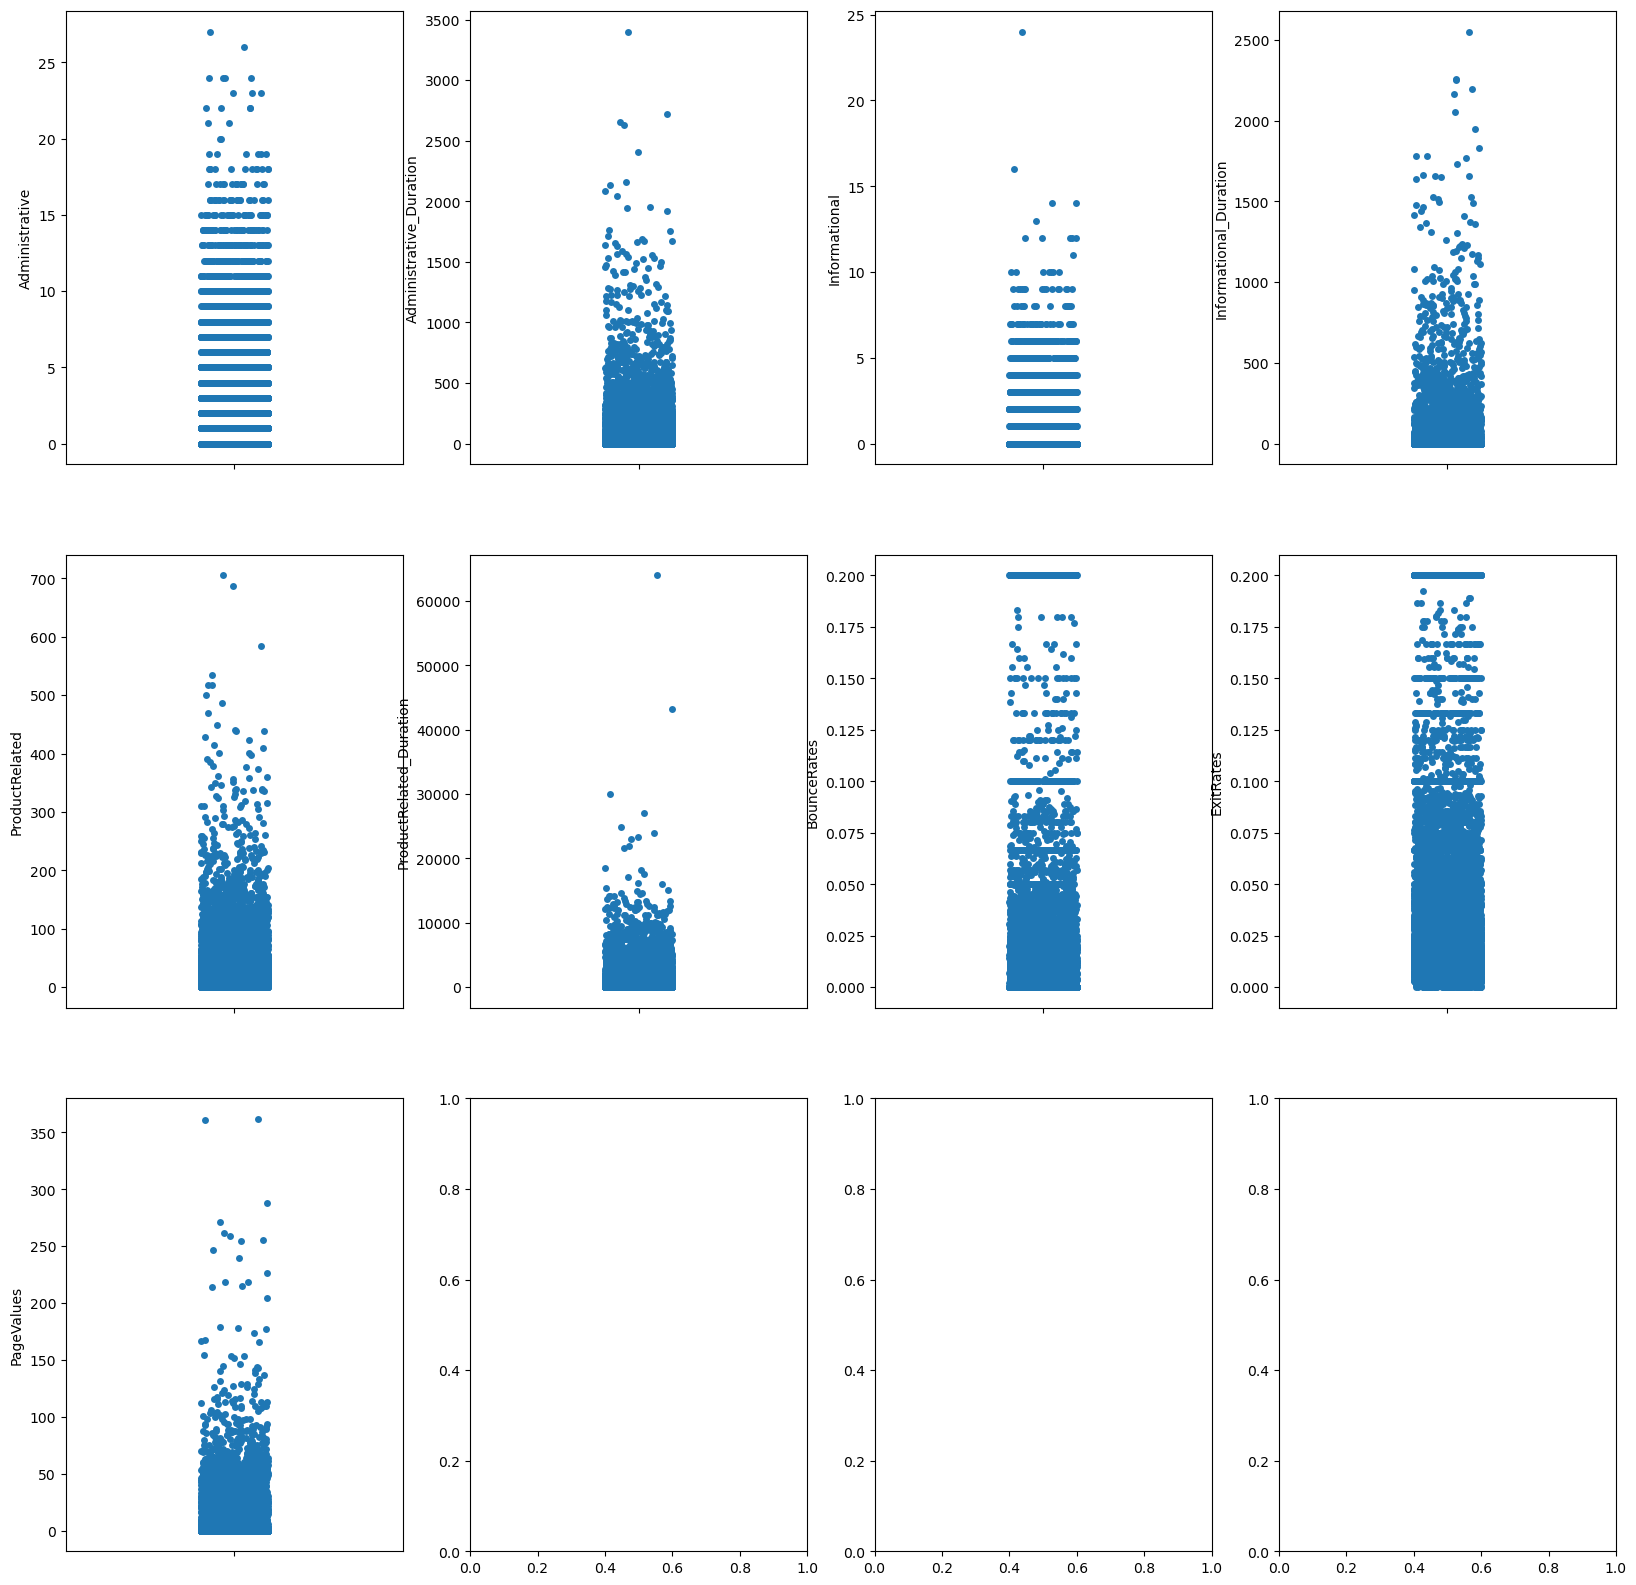

In [16]:
# check outliers of numerical columns

fig, ax = plt.subplots(3,4, figsize=(20,20))

sns.stripplot(y='Administrative', data=df,ax=ax[0,0])
sns.stripplot(y='Administrative_Duration', data=df,ax=ax[0,1])
sns.stripplot(y='Informational', data=df,ax=ax[0,2])
sns.stripplot(y='Informational_Duration', data=df,ax=ax[0,3])
sns.stripplot(y='ProductRelated', data=df,ax=ax[1,0])
sns.stripplot(y='ProductRelated_Duration', data=df,ax=ax[1,1])
sns.stripplot(y='BounceRates', data=df,ax=ax[1,2])
sns.stripplot(y='ExitRates', data=df,ax=ax[1,3])
sns.stripplot(y='PageValues', data=df,ax=ax[2,0])

plt.show()

### compare customer attributes between outliers and non-outliers

In [17]:
# create new columns prepresent outliers

df['high_ExitRates'] = df.ExitRates == 0.2
df['high_BounceRates'] = df.BounceRates == 0.2
# df = df.drop('long_ExitRates', axis=1)
# df = df.drop('long_BounceRates', axis=1)
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

   high_ExitRates  high_BounceRates  
0            True              True  
1           False             False  
2            True              True  
3           False             False  
4           False             False

In [18]:
# define a function for outliers comparison

def compare_outliers(by, value):
#     calculate percentage of 'value'
    total_counts = df.groupby(by)[value].count()
    outliers_percentage = (df.groupby(by)[value].value_counts() / total_counts * 100).unstack().T

#     plot the 'value'
    plt.figure(figsize=(5, 4))
    sns.barplot(data=outliers_percentage, x=value, y=False, color='blue', alpha=0.6, label='not outliers')
    sns.barplot(data=outliers_percentage, x=value, y=True, color='yellow', alpha=0.6, label='outliers')
    plt.show()

    return outliers_percentage
                                  

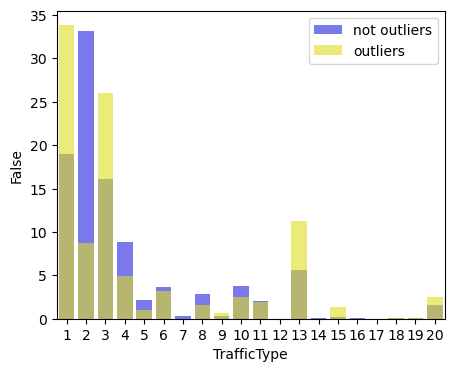

high_ExitRates      False      True 
TrafficType                         
1               19.027539  33.802817
2               33.141136   8.732394
3               16.067126  26.056338
4                8.898451   4.929577
5                2.177281   0.985915
6                3.623064   3.239437
7                0.344234        NaN
8                2.857143   1.549296
9                0.318417   0.704225
10               3.717728   2.535211
11               2.005164   1.971831
12               0.008606        NaN
13               5.662651  11.267606
14               0.111876        NaN
15               0.240964   1.408451
16               0.025818        NaN
17               0.008606        NaN
18               0.077453   0.140845
19               0.137694   0.140845
20               1.549053   2.535211

In [19]:
# 'TrafficType' between outliers and non-outliers

compare_outliers('high_ExitRates', 'TrafficType')

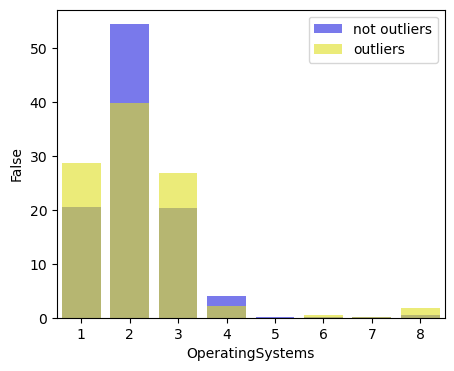

high_ExitRates        False      True 
OperatingSystems                      
1                 20.490534  28.732394
2                 54.371773  39.859155
3                 20.352840  26.760563
4                  3.975904   2.253521
5                  0.051635        NaN
6                  0.137694   0.422535
7                  0.051635   0.140845
8                  0.567986   1.830986

In [20]:
# 'OperatingSystems' between outliers and non-outliers

compare_outliers('high_ExitRates', 'OperatingSystems')

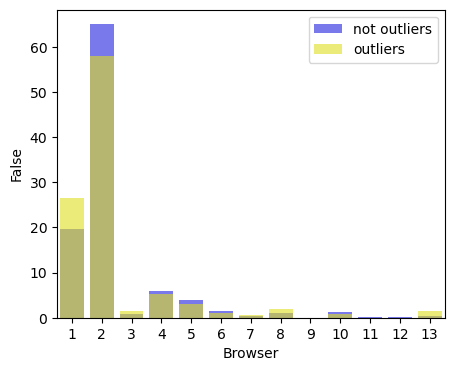

high_ExitRates      False      True 
Browser                             
1               19.569707  26.478873
2               64.974182  57.887324
3                0.817556   1.408451
4                6.006885   5.352113
5                3.838210   2.957746
6                1.428571   1.126761
7                0.387263   0.563380
8                1.041308   1.971831
9                0.008606        NaN
10               1.351119   0.845070
11               0.051635        NaN
12               0.086059        NaN
13               0.438898   1.408451

In [21]:
# 'Browser' between outliers and non-outliers

compare_outliers('high_ExitRates', 'Browser')

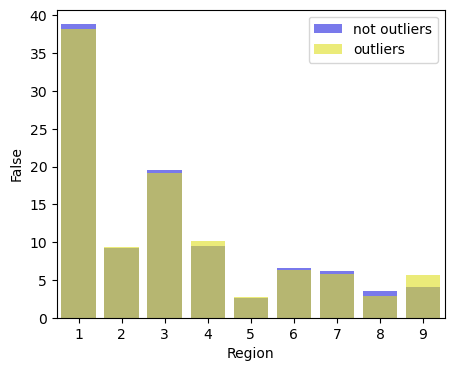

high_ExitRates      False      True 
Region                              
1               38.803787  38.169014
2                9.208262   9.295775
3               19.509466  19.154930
4                9.552496  10.140845
5                2.573150   2.676056
6                6.540448   6.338028
7                6.196213   5.774648
8                3.562823   2.816901
9                4.053356   5.633803

In [22]:
# 'Region' between outliers and non-outliers

compare_outliers('high_ExitRates', 'Region')

# 2. Data recode

## 2.1 replace values of 'month' column with numbers

In [23]:
# mapping values

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# replace values
df['Month'] = df['Month'].replace(month_mapping)

# check df
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

   high_ExitRates  high_BounceRates  
0            True              True  
1           False             False  
2            True              True  
3           False             False  
4           False             False

## 2.2 recode small groups (n < 50) of OS and browsers into new category
new value: 0 = others (other os, other browsers)

In [24]:
# create mapping values for small groups
os_mapping = {6: 0, 7: 0, 5: 0}
browser_mapping = {7: 0, 12: 0, 11: 0, 9: 0}

# Recode small groups into 0 (others)
df['OperatingSystems'] = df['OperatingSystems'].replace(os_mapping)

# Recode small groups into 0
df['Browser'] = df['Browser'].replace(browser_mapping)

In [25]:
# check new values
df.OperatingSystems.value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
0      32
Name: count, dtype: int64

In [26]:
# check new values
df.Browser.value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
0       66
13      61
Name: count, dtype: int64

## 2.3 covert 'Revenue' to int

In [27]:
# convert "Revenue" col for further viz
df['Revenue_int'] = df['Revenue'].astype(int)

# 3. data analysis

## 3.1 temporal trend

In [28]:
temporal_revenue = pd.DataFrame(df.groupby('Month')['Revenue'].mean())

In [35]:
# temporal_revenue

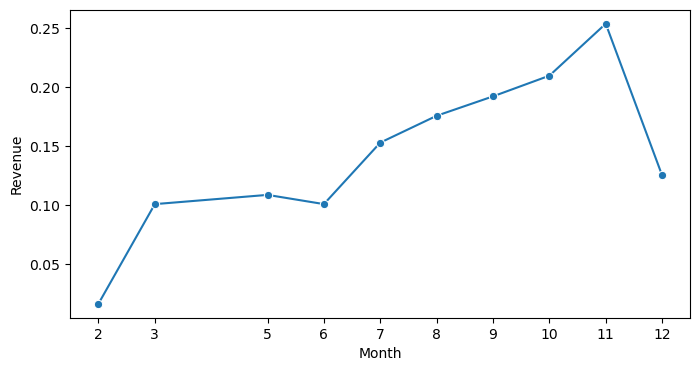

In [29]:
# Plot the temporal trend of purchase rate

plt.figure(figsize=(8, 4))
sns.lineplot(data=temporal_revenue, x='Month', y="Revenue", marker='o')
plt.xticks(temporal_revenue.index)
plt.show()

## 3.2 behavioural profile comparison

In [21]:
# install plotly package

# pip install plotly

In [30]:
import plotly.express as px


# Create a parallel coordinates plot using the 'Color' column
fig = px.parallel_coordinates(df, color="Revenue_int",
                              dimensions=['Administrative', 'Administrative_Duration', 'Informational',
                              'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                              'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5,
                              width=1200, 
                              height=500,
                              labels = 'Revenue_int')

fig.show()


In [31]:
# # V2 (looks worse)

# df['Color'] = df['Revenue_int'].map({0: 'blue', 1: 'red'})

# # Create a parallel coordinates plot using the 'Color' column
# fig = px.parallel_coordinates(df, color="Revenue_int",
#                               dimensions=['Administrative', 'Administrative_Duration', 'Informational',
#                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
#                              width=1200, height=500)

# fig.show()

## 3.3 subgroup comparison of purchase rate

### define a function for subgroup comparison

In [32]:
# define a function for subgroup comparison

def compare_subgroup(by, value):
    df_grouped = pd.DataFrame(df.groupby(by)[value].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False))
    plt.figure(figsize=(5, 4))
    sns.barplot(data=df_grouped, x=by, y='mean')
    plt.xticks(range(len(df_grouped)), df_grouped.index)
    plt.ylabel('Revenue')
    plt.show()
    return df_grouped

### OperatingSystems

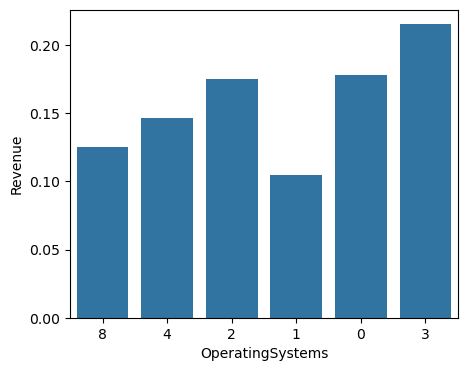

mean       std  count
OperatingSystems                           
8                 0.215190  0.413580     79
4                 0.177824  0.382765    478
2                 0.174973  0.379973   6601
1                 0.146615  0.353790   2585
0                 0.125000  0.336011     32
3                 0.104892  0.306475   2555

In [33]:
compare_subgroup('OperatingSystems', 'Revenue')

### VisitorType

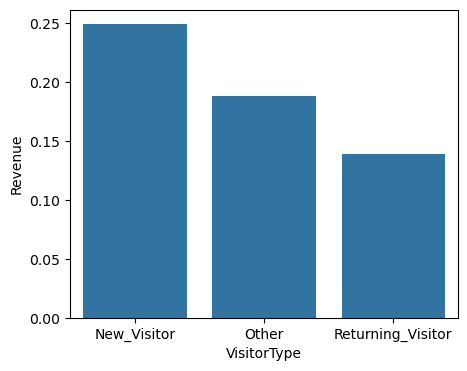

mean       std  count
VisitorType                                 
New_Visitor        0.249115  0.432628   1694
Other              0.188235  0.393220     85
Returning_Visitor  0.139323  0.346300  10551

In [34]:
compare_subgroup('VisitorType', 'Revenue')

### Browser

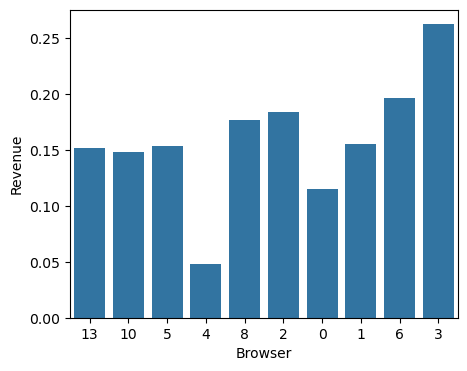

mean       std  count
Browser                           
13       0.262295  0.443533     61
10       0.196319  0.398437    163
5        0.184154  0.388026    467
4        0.176630  0.381615    736
8        0.155556  0.363783    135
2        0.153624  0.360611   7961
0        0.151515  0.361298     66
1        0.148253  0.355423   2462
6        0.114943  0.319873    174
3        0.047619  0.213980    105

In [35]:
compare_subgroup('Browser', 'Revenue')

### Region

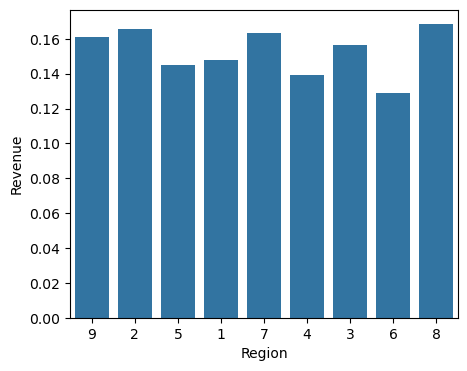

mean       std  count
Region                           
9       0.168297  0.374497    511
2       0.165493  0.371789   1136
5       0.163522  0.370424    318
1       0.161297  0.367843   4780
7       0.156373  0.363448    761
4       0.148054  0.355304   1182
3       0.145235  0.352411   2403
6       0.139130  0.346298    805
8       0.129032  0.335623    434

In [36]:
compare_subgroup('Region', 'Revenue')

### Weekend

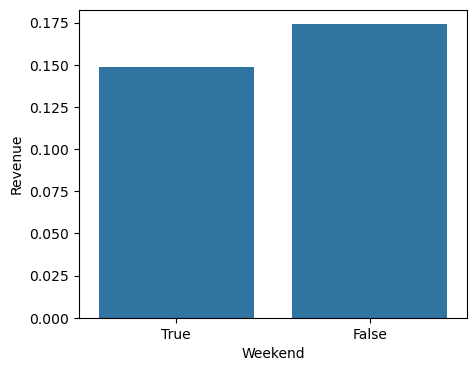

mean       std  count
Weekend                           
True     0.173989  0.379166   2868
False    0.148911  0.356020   9462

In [37]:
compare_subgroup('Weekend', 'Revenue')

### inferrential stats (Chi-square)
* goal: to compare if the between-group difference of purchase rate is significant or not 
* results: except region, all the other between-group difference is significant.

In [38]:
from scipy.stats import chi2_contingency

# define a function for Chi-square test
def chi_square_test(by, metric):
    # contingency table
    contingency = pd.crosstab(index=df[by], columns=df[metric])
    # chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f'\nFor {by}:')
    print(f"Chi-square: {chi2}")
    print(f"p value: {p:.10f}")
    print(f"Degrees of freedom: {dof}")

    
# perform Chi-square test
chi_square_test('OperatingSystems', 'Revenue')
chi_square_test('VisitorType', 'Revenue')
chi_square_test('Browser', 'Revenue')
chi_square_test('Region', 'Revenue')
chi_square_test('Weekend', 'Revenue')



For OperatingSystems:
Chi-square: 74.87376620966293
p value: 0.0000000000
Degrees of freedom: 5

For VisitorType:
Chi-square: 135.2519228192047
p value: 0.0000000000
Degrees of freedom: 2

For Browser:
Chi-square: 25.52713451619281
p value: 0.0024401875
Degrees of freedom: 9

For Region:
Chi-square: 9.252751430579844
p value: 0.3214249979
Degrees of freedom: 8

For Weekend:
Chi-square: 10.390978319534856
p value: 0.0012663251
Degrees of freedom: 1


## 3.4 correlation analysis
* Question: How does browsing influence purchase conversion rate? Is quick browsing more likely to lead to a higher purchase rate or is it the other way around? 
* Answer: mild positive correlation was found, r=0.15, p<0.05. So longer browsing is slightly related to higher purchased rate.

### plot the variables

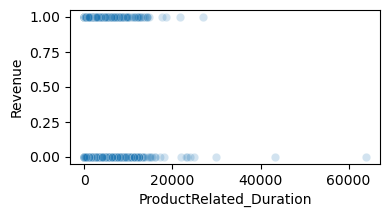

In [39]:
# check scatter points

plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='ProductRelated_Duration', y='Revenue', alpha=0.2)
plt.show()

### perform correlation test

In [40]:
# because 'Revenue' is binary, we use pointbiserialr here.
from scipy.stats import pointbiserialr

# define a function for correlation test
def correlation_test(var1, var2):
    # Perform Pearson correlation
    correlation_coefficient, p = pointbiserialr(var1, var2)

    print(f"Correlation coefficient: {correlation_coefficient}")
    print(f"P-value: {p:.10f}")

    # Check for statistical significance
    alpha = 0.05  # Set your significance level
    if p < alpha:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")

# perform correlation test
correlation_test(df['ProductRelated_Duration'], df['Revenue'])


Correlation coefficient: 0.15237261055701035
P-value: 0.0000000000
The correlation is statistically significant.


# 4. Modelling
Build a classification model for predicting purchase (supervised).

## 4.1 drop duplicated columns

In [41]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'high_ExitRates', 'high_BounceRates',
       'Revenue_int'],
      dtype='object')

In [42]:
df = df.drop(['Revenue_int', 'high_ExitRates',
       'high_BounceRates'], axis=1)

## 4.2 overall correlation check

In [43]:
# get correlation matrix

corr = df.corr(numeric_only=True)

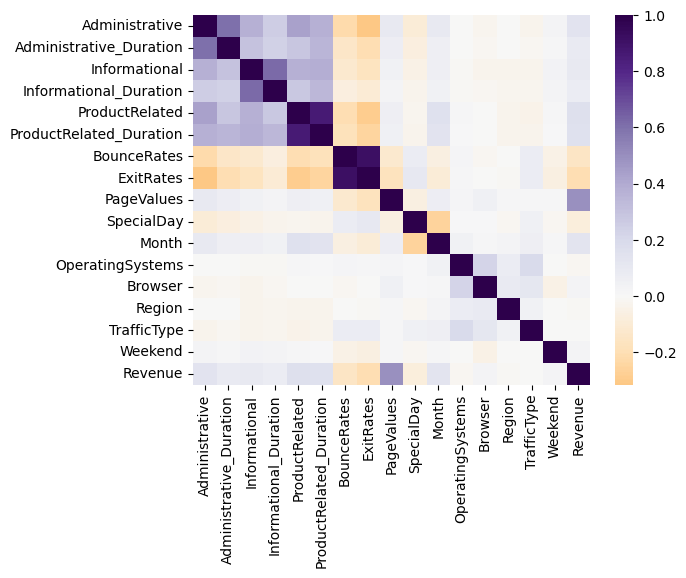

In [44]:
# visualise correlation

sns.heatmap(corr, cmap='PuOr', center=0);

In [91]:
# sns.pairplot(df)

## 4.3 Feature engineering

#### perform one-hot encoding

In [45]:
# select categorical cols (all nominal variables)
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# check result
df_encoded.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Weekend', 'Revenue', 'OperatingSystems_0', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_8', 'Browser_0', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8',
       'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_

In [46]:
# Move 'Revenue' to the last column

column_to_move = 'Revenue'

# create a list of column names excluding the one to move
columns = [col for col in df_encoded.columns if col != column_to_move]

# move the revenue column to the end
columns.append(column_to_move)

# create a new df with the right order
df_preprocessed = df_encoded[columns]


In [47]:
# check if Revenue is now the last column
df_preprocessed.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Weekend', 'OperatingSystems_0', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_8', 'Browser_0', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_8',
       'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'Traff

In [48]:
# # Drop 'Revenue_int' column

# df_preprocessed = df_preprocessed.drop('Revenue_int', axis=1)
# df_preprocessed.columns

In [49]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Month                          12330 non-null  int64  
 11  Weekend                        12330 non-null  bool   
 12  OperatingSystems_0             12330 non-null 

## 4.3 model building

### Split data

In [50]:
# import packages

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

In [51]:
# split data

X = df_preprocessed.drop('Revenue', axis=1)
y = df_preprocessed['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X.shape, y.shape

((12330, 60), (12330,))

### Train the model

In [53]:
# instantiate model
clf = RandomForestClassifier(random_state=45)

# fit model
clf.fit(X_train, y_train)

# Predict
y_preds_base = clf.predict(X_test)

# Evaluate
accuracy_base = round(accuracy_score(y_test, y_preds_base), 3)
precision_base = round(precision_score(y_test, y_preds_base), 3)
recall_base = round(recall_score(y_test, y_preds_base), 3)
F1_base = round(f1_score(y_test, y_preds_base), 3)

print("Accuracy:", accuracy_base)
print("Precision:", precision_base)
print("Recall:", recall_base)
print("F1 score:", F1_base)

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

Accuracy: 0.895
Precision: 0.745
Recall: 0.494
F1 score: 0.594


### Hyperparameter Tuning

In [54]:
# create the range of hyperparams
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# create a random forest classifier
rf = RandomForestClassifier()

# random search for finding the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, random_state=45)

# fit the random search object to the data
rand_search.fit(X_train, y_train)

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdbb627f610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdbb7c400d0>},
                   random_state=45)

In [55]:
# Create a variable to save the best params
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

Best hyperparameters: {'max_depth': 12, 'n_estimators': 464}


### Evaluate on test set

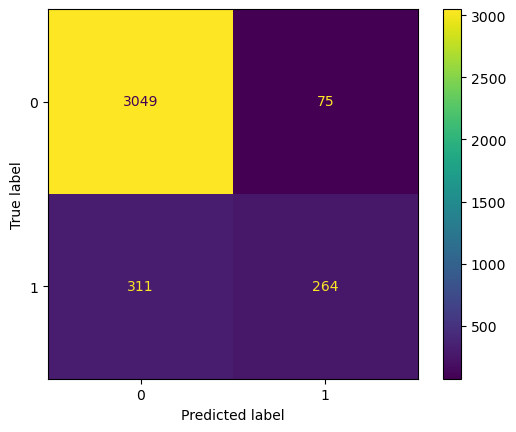

In [56]:
# Generate predictions with the best model
y_preds_opt = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds_opt)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

In [57]:
accuracy_test_opt = round(accuracy_score(y_test, y_preds_opt), 3)
precision_test_opt = round(precision_score(y_test, y_preds_opt), 3)
recall_test_opt = round(recall_score(y_test, y_preds_opt), 3)
F1_test_opt = round(f1_score(y_test, y_preds_opt), 3)

print("Accuracy:", accuracy_test_opt)
print("Precision:", precision_test_opt)
print("Recall:", recall_test_opt)
print("F1 score:", F1_test_opt)

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

Accuracy: 0.896
Precision: 0.779
Recall: 0.459
F1 score: 0.578


### See feature importance

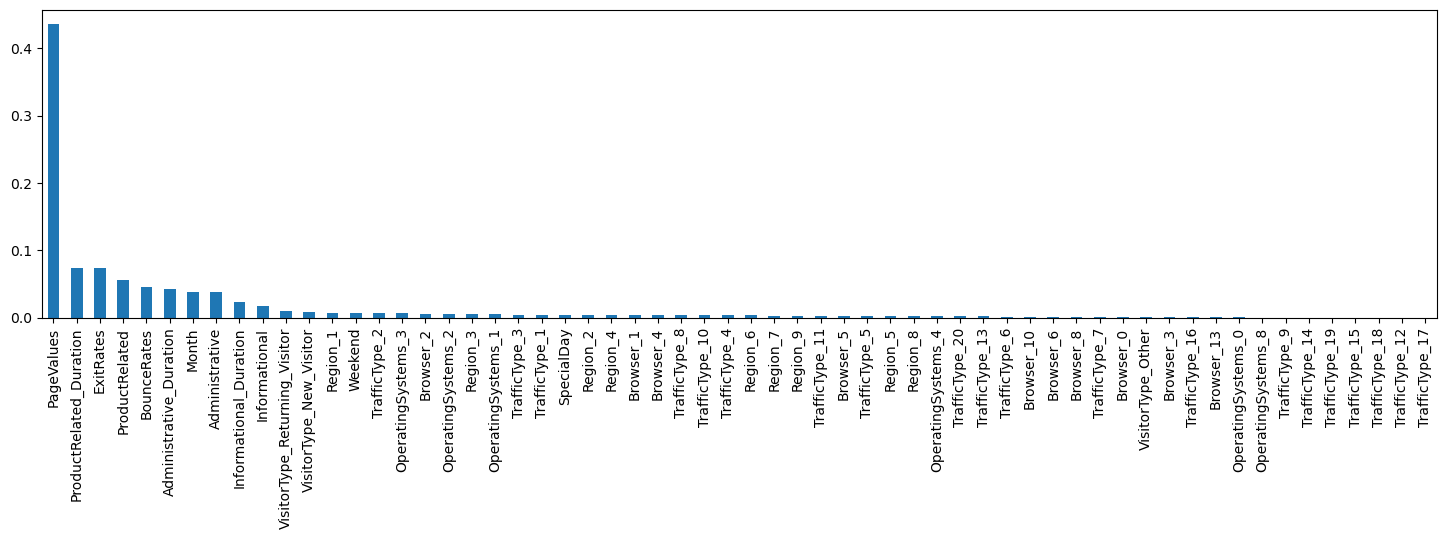

In [58]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(18, 4))
feature_importances.plot.bar();

# reference：https://www.datacamp.com/tutorial/random-forests-classifier-python

## Customer segmentation (clustering analysis) (discarded)

### Feature Engineering
"When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training." -- reference: https://www.datacamp.com/tutorial/k-means-clustering-python

In [285]:
# from sklearn import preprocessing

# X_train_norm = preprocessing.normalize(X_train)
# X_test_norm = preprocessing.normalize(X_test)

### Fit kmeans model

#### Fit kmeans model

In [286]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
# kmeans.fit(X_train_norm)

#### find the best n_clusters

In [287]:
# from sklearn.metrics import silhouette_score

# # evaluate performance of the clustering  using a Silhouette score 
# # lower score represents a better fit
# silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

# # Choosing the best num of clusters using the Elbow method
# K = range(2, 8)
# fits = []
# score = []

# for k in K:
#     # train the model for current value of k on training data
#     model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
#     # append the model to fits
#     fits.append(model)
    
#     # Append the silhouette score to scores
#     score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [288]:
# # Plot scores and numbers of K

# # 4 would be the best number as the performance is alright and model won't be too complex
# sns.lineplot(x = K, y = score);